In [ ]:
import pandas as pd

# import the csv from local machine
from google.colab import files
uploaded = files.upload()

Saving studpor.csv to studpor (2).csv


In [ ]:
#import csv containing math scores
up2 = files.upload()

Saving studmat.csv to studmat (3).csv


## Preparing the Data

In [ ]:
#read in csv and create new dataframe for portuguese scores
sp = pd.read_csv('studpor.csv')
sp
sp.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
#read in csv and create new dataframe for math scores
sm = pd.read_csv('studmat.csv')
sm.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
#merge the two dataframes into one model
sp = pd.concat([sp, sm])
sp

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Random Forest Regressor Model

In [ ]:
#import necessary scikit-learn packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
#Preprocessing

#label encoding for all binary columns
bin_cols = ['school','sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
lab_enc = LabelEncoder()
for col in bin_cols:
  sp[col] = lab_enc.fit_transform(sp[col]) # iterate throug each data column thats binary and apply label encoding

#one-shot encoding for all categorical/nominal columns
sp = pd.get_dummies(sp, columns=['Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)
sp.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,False,False,False,False,True,False,False,False,True,False
1,0,0,17,1,0,1,1,1,1,2,...,False,False,True,False,False,False,False,False,False,False
2,0,0,15,1,1,1,1,1,1,2,...,False,False,True,False,False,False,True,False,True,False
3,0,0,15,1,0,1,4,2,1,3,...,False,False,False,True,False,True,False,False,True,False
4,0,0,16,1,0,1,3,3,1,2,...,False,False,True,False,False,True,False,False,False,False


In [ ]:
#Creating test and training sets

X = sp.drop(['G1', 'G2','G3'], axis = 1) # set of features to feed into regressor, obvs must drop scores
y = sp['G3'] #target features

# split data into training and testsets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# build and train Random Forest Regressor Model

# Init RF Regressor, start with 100 estimators
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
import numpy as np

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# Calculate the ROOT Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.4f}')

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.4f}')


Mean Squared Error: 11.4037
Root Mean Squared Error: 3.3769
R-squared: 0.2182


In [ ]:
# Get feature importances from the trained model
feature_importances = rf.feature_importances_

# Create a DataFrame to view feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort =by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


              Feature  Importance
10           failures    0.184549
25           absences    0.144758
21              goout    0.039495
2                 age    0.038760
24             health    0.038660
20           freetime    0.037915
6                Medu    0.032412
7                Fedu    0.028831
13               paid    0.028144
23               Walc    0.027416
11          schoolsup    0.027385
19             famrel    0.026357
9           studytime    0.026066
16             higher    0.023169
8          traveltime    0.022343
22               Dalc    0.019542
36  reason_reputation    0.018100
1                 sex    0.014479
29       Mjob_teacher    0.014006
33       Fjob_teacher    0.013993
14         activities    0.013850
27         Mjob_other    0.013802
28      Mjob_services    0.012852
34        reason_home    0.012769
4             famsize    0.012500
15            nursery    0.012201
3             address    0.011961
0              school    0.011295
12            

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Run 5 fold cross val for extra checking
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE back to positive (since cross_val_score returns negative MSE), then get the sq root
cv_scores = -cv_scores
rcv_scores = np.sqrt(cv_scores)

# Print out the cross-validation results
print(f"Cross-validated MSE scores: {cv_scores}")
print(f"Average MSE: {cv_scores.mean():.4f}")
print(f"Standard Deviation of MSE: {cv_scores.std():.4f}")
print("-----------")
# Print out RMSE vakues
print(f"Cross Validated RMSE scores: {rcv_scores}")
print(f"Average RMSE: {rcv_scores.mean():.4f}")


Cross-validated MSE scores: [ 4.81264946 10.73871954 11.2372829  15.12536583 17.16062703]
Average MSE: 11.8149
Standard Deviation of MSE: 4.2440
-----------
Cross Validated RMSE scores: [2.19377516 3.27699856 3.35220568 3.88913433 4.14253872]
Average RMSE: 3.3709


In [ ]:
sp

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,False,False,False,False,True,False,False,False,True,False
1,0,0,17,1,0,1,1,1,1,2,...,False,False,True,False,False,False,False,False,False,False
2,0,0,15,1,1,1,1,1,1,2,...,False,False,True,False,False,False,True,False,True,False
3,0,0,15,1,0,1,4,2,1,3,...,False,False,False,True,False,True,False,False,True,False
4,0,0,16,1,0,1,3,3,1,2,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,False,False,False,True,False,False,False,False,False,True
391,1,1,17,1,1,1,3,1,2,1,...,False,False,False,True,False,False,False,False,True,False
392,1,1,21,0,0,1,1,1,1,1,...,False,False,True,False,False,False,False,False,False,True
393,1,1,18,0,1,1,3,2,3,1,...,False,False,True,False,False,False,False,False,True,False


## Reducing Feature Set to Top 10

Creating a Regressor Tree with Smaller Features

In [ ]:
# Isolate 10 features based on feature importance
top_10_features = ['failures', 'absences', 'Medu', 'studytime', 'paid', 'traveltime', 'freetime', 'age', 'goout', 'health']

# Create a new DataFrame with only the selected features
X_top_10 = X[top_10_features]

# Split the data into training and testing sets (80% train, 20% test)
X_train_top_10, X_test_top_10, y_train_top_10, y_test_top_10 = train_test_split(X_top_10, y, test_size=0.2, random_state=42)

print(f'Training data size: {X_train_top_10.shape[0]} samples')
print(f'Testing data size: {X_test_top_10.shape[0]} samples')

Training data size: 835 samples
Testing data size: 209 samples


In [ ]:
# Initialize the RandomForestRegressor
rf_top_10 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_top_10.fit(X_train_top_10, y_train_top_10)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_top_10 = rf_top_10.predict(X_test_top_10)

# Calculate the Mean Squared Error (MSE)
mse_top_10 = mean_squared_error(y_test_top_10, y_pred_top_10)
print(f'Mean Squared Error (Top 10 features): {mse_top_10:.4f}')

rmse10 = np.sqrt(mse_top_10)
print(f'RSME for Top 10: {rmse10}')

# Calculate the R-squared (R²) score
r2_top_10 = r2_score(y_test_top_10, y_pred_top_10)
print(f'R-squared (Top 10 features): {r2_top_10:.4f}')


Mean Squared Error (Top 10 features): 12.0004
RSME for Top 10: 3.4641545348034266
R-squared (Top 10 features): 0.1773


In [ ]:
t10_scores = cross_val_score(rf_top_10, X, y, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# 4. Convert to RMSE and report
t10_scores = np.sqrt(-t10_scores)
print("Fold-wise RMSE:      ", np.round(t10_scores, 3))
print("Mean CV RMSE:       ", np.round(t10_scores.mean(), 3))
print("Std. dev. of RMSE:  ", np.round(t10_scores.std(), 3))

Fold-wise RMSE:       [2.194 3.277 3.352 3.889 4.143]
Mean CV RMSE:        3.371
Std. dev. of RMSE:   0.672


## Running Cross Validation to Finetune the Model

Optimal number of features: 37
Selected features:
  school
  sex
  age
  address
  famsize
  Medu
  Fedu
  traveltime
  studytime
  failures
  schoolsup
  famsup
  paid
  activities
  nursery
  higher
  internet
  romantic
  famrel
  freetime
  goout
  Dalc
  Walc
  health
  absences
  Mjob_health
  Mjob_other
  Mjob_services
  Mjob_teacher
  Fjob_other
  Fjob_services
  Fjob_teacher
  reason_home
  reason_other
  reason_reputation
  guardian_mother
  guardian_other


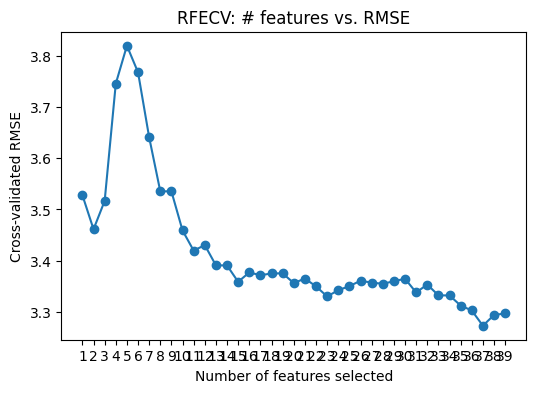

In [ ]:
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

# building recursive feature elimination cross validation model
rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=5,
    scoring='neg_mean_squared_error',  # for regressor
    n_jobs=-1
)

# train the model
rfecv.fit(X_train, y_train)

# print the optimal amt of features and which ones are used
print(f"Optimal number of features: {rfecv.n_features_}")
selected_feats = X_train.columns[rfecv.support_]
print("Selected features:\n ", "\n  ".join(selected_feats))

# Plot features (count) vs RMSE
mean_test_scores = rfecv.cv_results_['mean_test_score']
feature_counts  = np.arange(1, len(mean_test_scores) + 1)
rmse_scores     = np.sqrt(-mean_test_scores)

plt.figure(figsize=(6,4))
plt.plot(feature_counts, rmse_scores, marker='o')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validated RMSE")
plt.title("RFECV: # features vs. RMSE")
plt.xticks(feature_counts)
plt.show()

In [ ]:
# Make predictions on the test set
y_predCV = rfecv.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predCV)
print(f'Mean Squared Error: {mse:.4f}')

# Calculate the ROOT Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.4f}')

# Calculate the R-squared score
r2 = r2_score(y_test, y_predCV)
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 11.2867
Root Mean Squared Error: 3.3596
R-squared: 0.2262


In [ ]:
ev_scores = cross_val_score(rfecv, X, y, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# 4. Convert to RMSE and report
ev_scores = np.sqrt(-ev_scores)
print("Fold-wise RMSE:      ", np.round(ev_scores, 3))
print("Mean CV RMSE:       ", np.round(ev_scores.mean(), 3))
print("Std. dev. of RMSE:  ", np.round(ev_scores.std(), 3))

Fold-wise RMSE:       [2.21  3.277 3.35  3.889 4.208]
Mean CV RMSE:        3.387
Std. dev. of RMSE:   0.682


In [ ]:
importance_df

,Feature,Importance
10,failures,0.184549
25,absences,0.144758
21,goout,0.039495
2,age,0.038760
24,health,0.038660
20,freetime,0.037915
6,Medu,0.032412
7,Fedu,0.028831
13,paid,0.028144
23,Walc,0.027416


## Turning the question into a Classical Problem

In [ ]:
sp

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,False,False,False,False,True,False,False,False,True,False
1,0,0,17,1,0,1,1,1,1,2,...,False,False,True,False,False,False,False,False,False,False
2,0,0,15,1,1,1,1,1,1,2,...,False,False,True,False,False,False,True,False,True,False
3,0,0,15,1,0,1,4,2,1,3,...,False,False,False,True,False,True,False,False,True,False
4,0,0,16,1,0,1,3,3,1,2,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,False,False,False,True,False,False,False,False,False,True
391,1,1,17,1,1,1,3,1,2,1,...,False,False,False,True,False,False,False,False,True,False
392,1,1,21,0,0,1,1,1,1,1,...,False,False,True,False,False,False,False,False,False,True
393,1,1,18,0,1,1,3,2,3,1,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
csp = sp.drop(['G1', 'G2'], axis=1)

# define bins to separate G3 scores
bins = [ -1,  9, 14, 20 ]
labels = ['Poor', 'Passing', 'Excellent']           # 0=fail, 1=pass, 2=good

csp['G3_cat'] = pd.cut(csp['G3'], bins=bins, labels=labels)
csp['G3_cat'].value_counts()

,count
G3_cat,
Passing,610
Poor,230
Excellent,204


In [ ]:
csp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 394
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   school             1044 non-null   int64   
 1   sex                1044 non-null   int64   
 2   age                1044 non-null   int64   
 3   address            1044 non-null   int64   
 4   famsize            1044 non-null   int64   
 5   Pstatus            1044 non-null   int64   
 6   Medu               1044 non-null   int64   
 7   Fedu               1044 non-null   int64   
 8   traveltime         1044 non-null   int64   
 9   studytime          1044 non-null   int64   
 10  failures           1044 non-null   int64   
 11  schoolsup          1044 non-null   int64   
 12  famsup             1044 non-null   int64   
 13  paid               1044 non-null   int64   
 14  activities         1044 non-null   int64   
 15  nursery            1044 non-null   int64   
 16  higher      

In [ ]:
csp.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,G3_cat
0,0,0,18,1,0,0,4,4,2,2,...,False,False,False,True,False,False,False,True,False,Passing
1,0,0,17,1,0,1,1,1,1,2,...,False,True,False,False,False,False,False,False,False,Passing
2,0,0,15,1,1,1,1,1,1,2,...,False,True,False,False,False,True,False,True,False,Passing
3,0,0,15,1,0,1,4,2,1,3,...,False,False,True,False,True,False,False,True,False,Passing
4,0,0,16,1,0,1,3,3,1,2,...,False,True,False,False,True,False,False,False,False,Passing


In [ ]:
X = csp.drop(['G3', 'G3_cat'], axis=1)
y = csp['G3_cat']

# now we have all numeric columns!
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 394
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             1044 non-null   int64
 1   sex                1044 non-null   int64
 2   age                1044 non-null   int64
 3   address            1044 non-null   int64
 4   famsize            1044 non-null   int64
 5   Pstatus            1044 non-null   int64
 6   Medu               1044 non-null   int64
 7   Fedu               1044 non-null   int64
 8   traveltime         1044 non-null   int64
 9   studytime          1044 non-null   int64
 10  failures           1044 non-null   int64
 11  schoolsup          1044 non-null   int64
 12  famsup             1044 non-null   int64
 13  paid               1044 non-null   int64
 14  activities         1044 non-null   int64
 15  nursery            1044 non-null   int64
 16  higher             1044 non-null   int64
 17  internet           1

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfclass = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rfclass.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rfclass.predict(X_test)

print(classification_report(y_test, y_pred,
      target_names=['Poor','Passing','Excellent']))

# And view the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

        Poor       0.64      0.39      0.48        41
     Passing       0.62      0.72      0.67       122
   Excellent       0.31      0.28      0.30        46

    accuracy                           0.56       209
   macro avg       0.52      0.46      0.48       209
weighted avg       0.56      0.56      0.55       209

[[16 24  1]
 [ 6 88 28]
 [ 3 30 13]]


In [ ]:
sp.G3.value_counts()

,count
G3,
10,153
11,151
13,113
12,103
14,90
15,82
8,67
9,63
0,53
